<a href="https://colab.research.google.com/github/umesh2908/Machine-learning-projects/blob/master/MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from PIL import Image
from scipy import ndimage
import tensorflow as tf
import keras as K
from tensorflow.python.framework import ops
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

%matplotlib inline
np.random.seed(1)

Using TensorFlow backend.


In [3]:
from google.colab import files
uploaded = files.upload()

In [0]:
mnist_data = K.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [6]:
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


y = 1


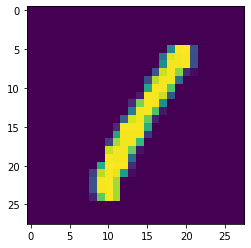

In [7]:
plt.imshow(x_train[3])
print ("y = " + str(np.squeeze(y_train[3])))

In [0]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [9]:
X_train = x_train/255.
X_test = x_test/255.
Y_train = K.utils.to_categorical(y_train, 10)
Y_test = K.utils.to_categorical(y_test, 10)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


In [0]:
model=Sequential()

In [0]:
#FirstCNN layer
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#secondCNN layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#thirdCNN layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#flatten layer
model.add(Flatten())
model.add(Dropout(0.2))


In [0]:
#fullyConnected layer
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 465s 8ms/step - loss: 0.2380 - accuracy: 0.9287 - val_loss: 0.0924 - val_accuracy: 0.9759
Epoch 2/10
60000/60000 [==============================] - 439s 7ms/step - loss: 0.0864 - accuracy: 0.9753 - val_loss: 0.0647 - val_accuracy: 0.9812
Epoch 3/10
60000/60000 [==============================] - 434s 7ms/step - loss: 0.0708 - accuracy: 0.9799 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 4/10
60000/60000 [==============================] - 428s 7ms/step - loss: 0.0674 - accuracy: 0.9808 - val_loss: 0.0470 - val_accuracy: 0.9856
Epoch 5/10
60000/60000 [==============================] - 425s 7ms/step - loss: 0.0597 - accuracy: 0.9834 - val_loss: 0.1776 - val_accuracy: 0.9583
Epoch 6/10
60000/60000 [==============================] - 420s 7ms/step - loss: 0.0579 - accuracy: 0.9834 - val_loss: 0.6947 - val_accuracy: 0.8834
Epoch 7/10
60000/60000 [==============================] - 411s

In [22]:
train_accuracy = model.evaluate( X_train,Y_train)
test_accuracy = model.evaluate( X_test, Y_test)
print("train_accuracy:", train_accuracy)
print("test_accuracy:", test_accuracy)

10000/10000 [==============================] - 16s 2ms/step
train_accuracy: [0.022604357737900378, 0.993483304977417]
test_accuracy: [0.027779427190730347, 0.9908999800682068]


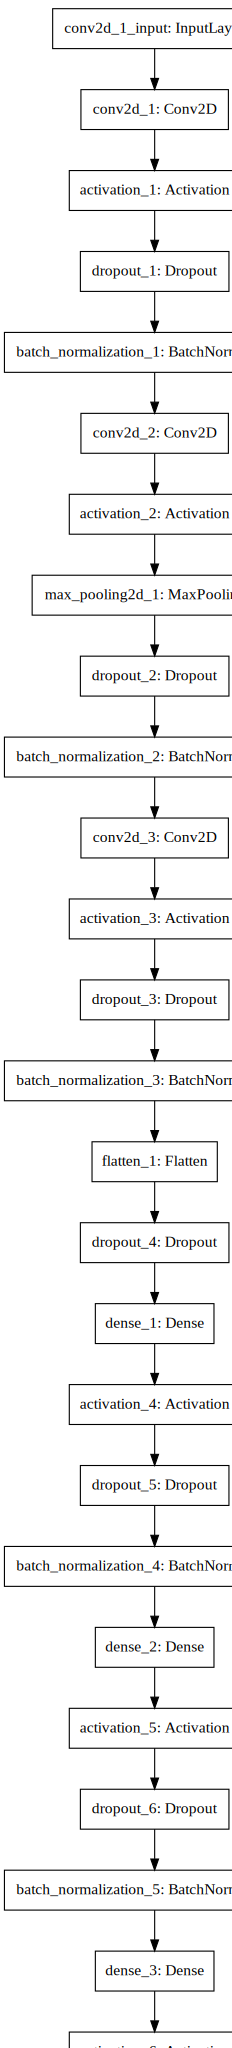

In [23]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)       